In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
sns.set()

In [2]:
import struct

N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr
# карта крупных рек, образующих пойму
H0 = ReadFile("H0.grd")
# карта русел
rusla = ReadFile("eriki.grd")
# карта дорог
Road = ReadFile("road_all_2022.grd")
# рельеф
relief_base = ReadFile("relief_base.grd")

VAP = ReadFile("VAP_35.grd")
print(R[340][440:450])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
brown = ["#c08457", "#ac6730", "#964b00", "#813a00", "#884000", "#8f4500", "#964b00", 
"#9d5107", "#a4560f", "#ab5c16", "#633309", "#4b280a", "#341d08", "#1f1204", "#000000"]
green = ["#62d44d", "#70bf5d", "#79aa6b", "#7e9576"]
color =  green + brown
blue = ['#619bcc', '#5b97ca', '#5593c8', '#4f8fc6', '#488bc4', '#4288c2',
'#3d84bf','#397bb3','#3777ac', '#3573a6','#336ea0','#316a9a', '#2f6694','#2d618e','#2b5d87',
'#295981','#27557b','#255075','#234c6f', '#214868','#1f4462','#1d3f5c','#1b3b56','#193750',
'#17334a','#152e43','#132a3d', '#112637', '#0f2231', '#0d1d2b', '#0b1925', '#09151e']

In [4]:
import os
content = os.listdir('Data/raschet/')
print(content)

['расчет 2016 relief_model_25_русел_без_дамб_dq1_q18', 'расчет 2016 relief_model_25_русел_без_дамб_dq2_q18', 'расчет 2016 relief_model_без_дамб_q17', 'расчет 2016 relief_model_без_дамб_q18', 'расчет 2016 relief_model_без_дамб_q_5_18_52дня', 'расчет 2016 relief_model_без_дамб_q_5_18_52дня.zip', 'расчет 2016 relief_model_дамба_6_q_5_18_52дня', 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18', 'расчет 2019 relief_model_дамба_12346789_6m_5r_d1_q18', 'расчет 2019 relief_model_дамба_12346789_6m_5r_d2_q18', 'расчет 2019 relief_model_дамба_12346789_6m_d2_q18', 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней', 'расчет 2019 relief_model_дамба_15_7м_q22_r3_3_45дней', 'расчет 2019 relief_model_дамба_1_10м_q16_20', 'расчет 2019 relief_model_дамба_1_10м_q18', 'расчет 2019 relief_model_дамба_24_7м_q22_r3_3_45дней', 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней']


In [6]:
plt.style.use('ggplot')

In [5]:
for i in content:
    print(i)

расчет 2016 relief_model_25_русел_без_дамб_dq1_q18
расчет 2016 relief_model_25_русел_без_дамб_dq2_q18
расчет 2016 relief_model_без_дамб_q17
расчет 2016 relief_model_без_дамб_q18
расчет 2016 relief_model_без_дамб_q_5_18_52дня
расчет 2016 relief_model_без_дамб_q_5_18_52дня.zip
расчет 2016 relief_model_дамба_6_q_5_18_52дня
расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18
расчет 2019 relief_model_дамба_12346789_6m_5r_d1_q18
расчет 2019 relief_model_дамба_12346789_6m_5r_d2_q18
расчет 2019 relief_model_дамба_12346789_6m_d2_q18
расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней
расчет 2019 relief_model_дамба_15_7м_q22_r3_3_45дней
расчет 2019 relief_model_дамба_1_10м_q16_20
расчет 2019 relief_model_дамба_1_10м_q18
расчет 2019 relief_model_дамба_24_7м_q22_r3_3_45дней
расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней


In [6]:
content[3], content[12], content[-1], content[5]

('расчет 2016 relief_model_без_дамб_q18',
 'расчет 2019 relief_model_дамба_1_10м_q18',
 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней',
 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18')

In [7]:
relief1 = ReadFile("Data/raschet/" + 'расчет 2016 relief_model_без_дамб_q_5_18_52дня' + "/relief.grd")
relief2 = ReadFile("Data/raschet/" + 'расчет 2019 relief_model_дамба_1_10м_q18' + "/relief.grd")
relief3 = ReadFile("Data/raschet/" + 'расчет 2019 relief_model_дамба_45_7м_q22_r3_3_45дней' + "/relief.grd")
relief4 = ReadFile("Data/raschet/" + 'расчет 2019 relief_model_дамба_12_7м_q22_r3_3_45дней' + "/relief.grd")
relief5 = ReadFile("Data/raschet/" + 'расчет 2019 relief_model_дамба_12346789_6m_5r_d0_q18' + "/relief.grd")

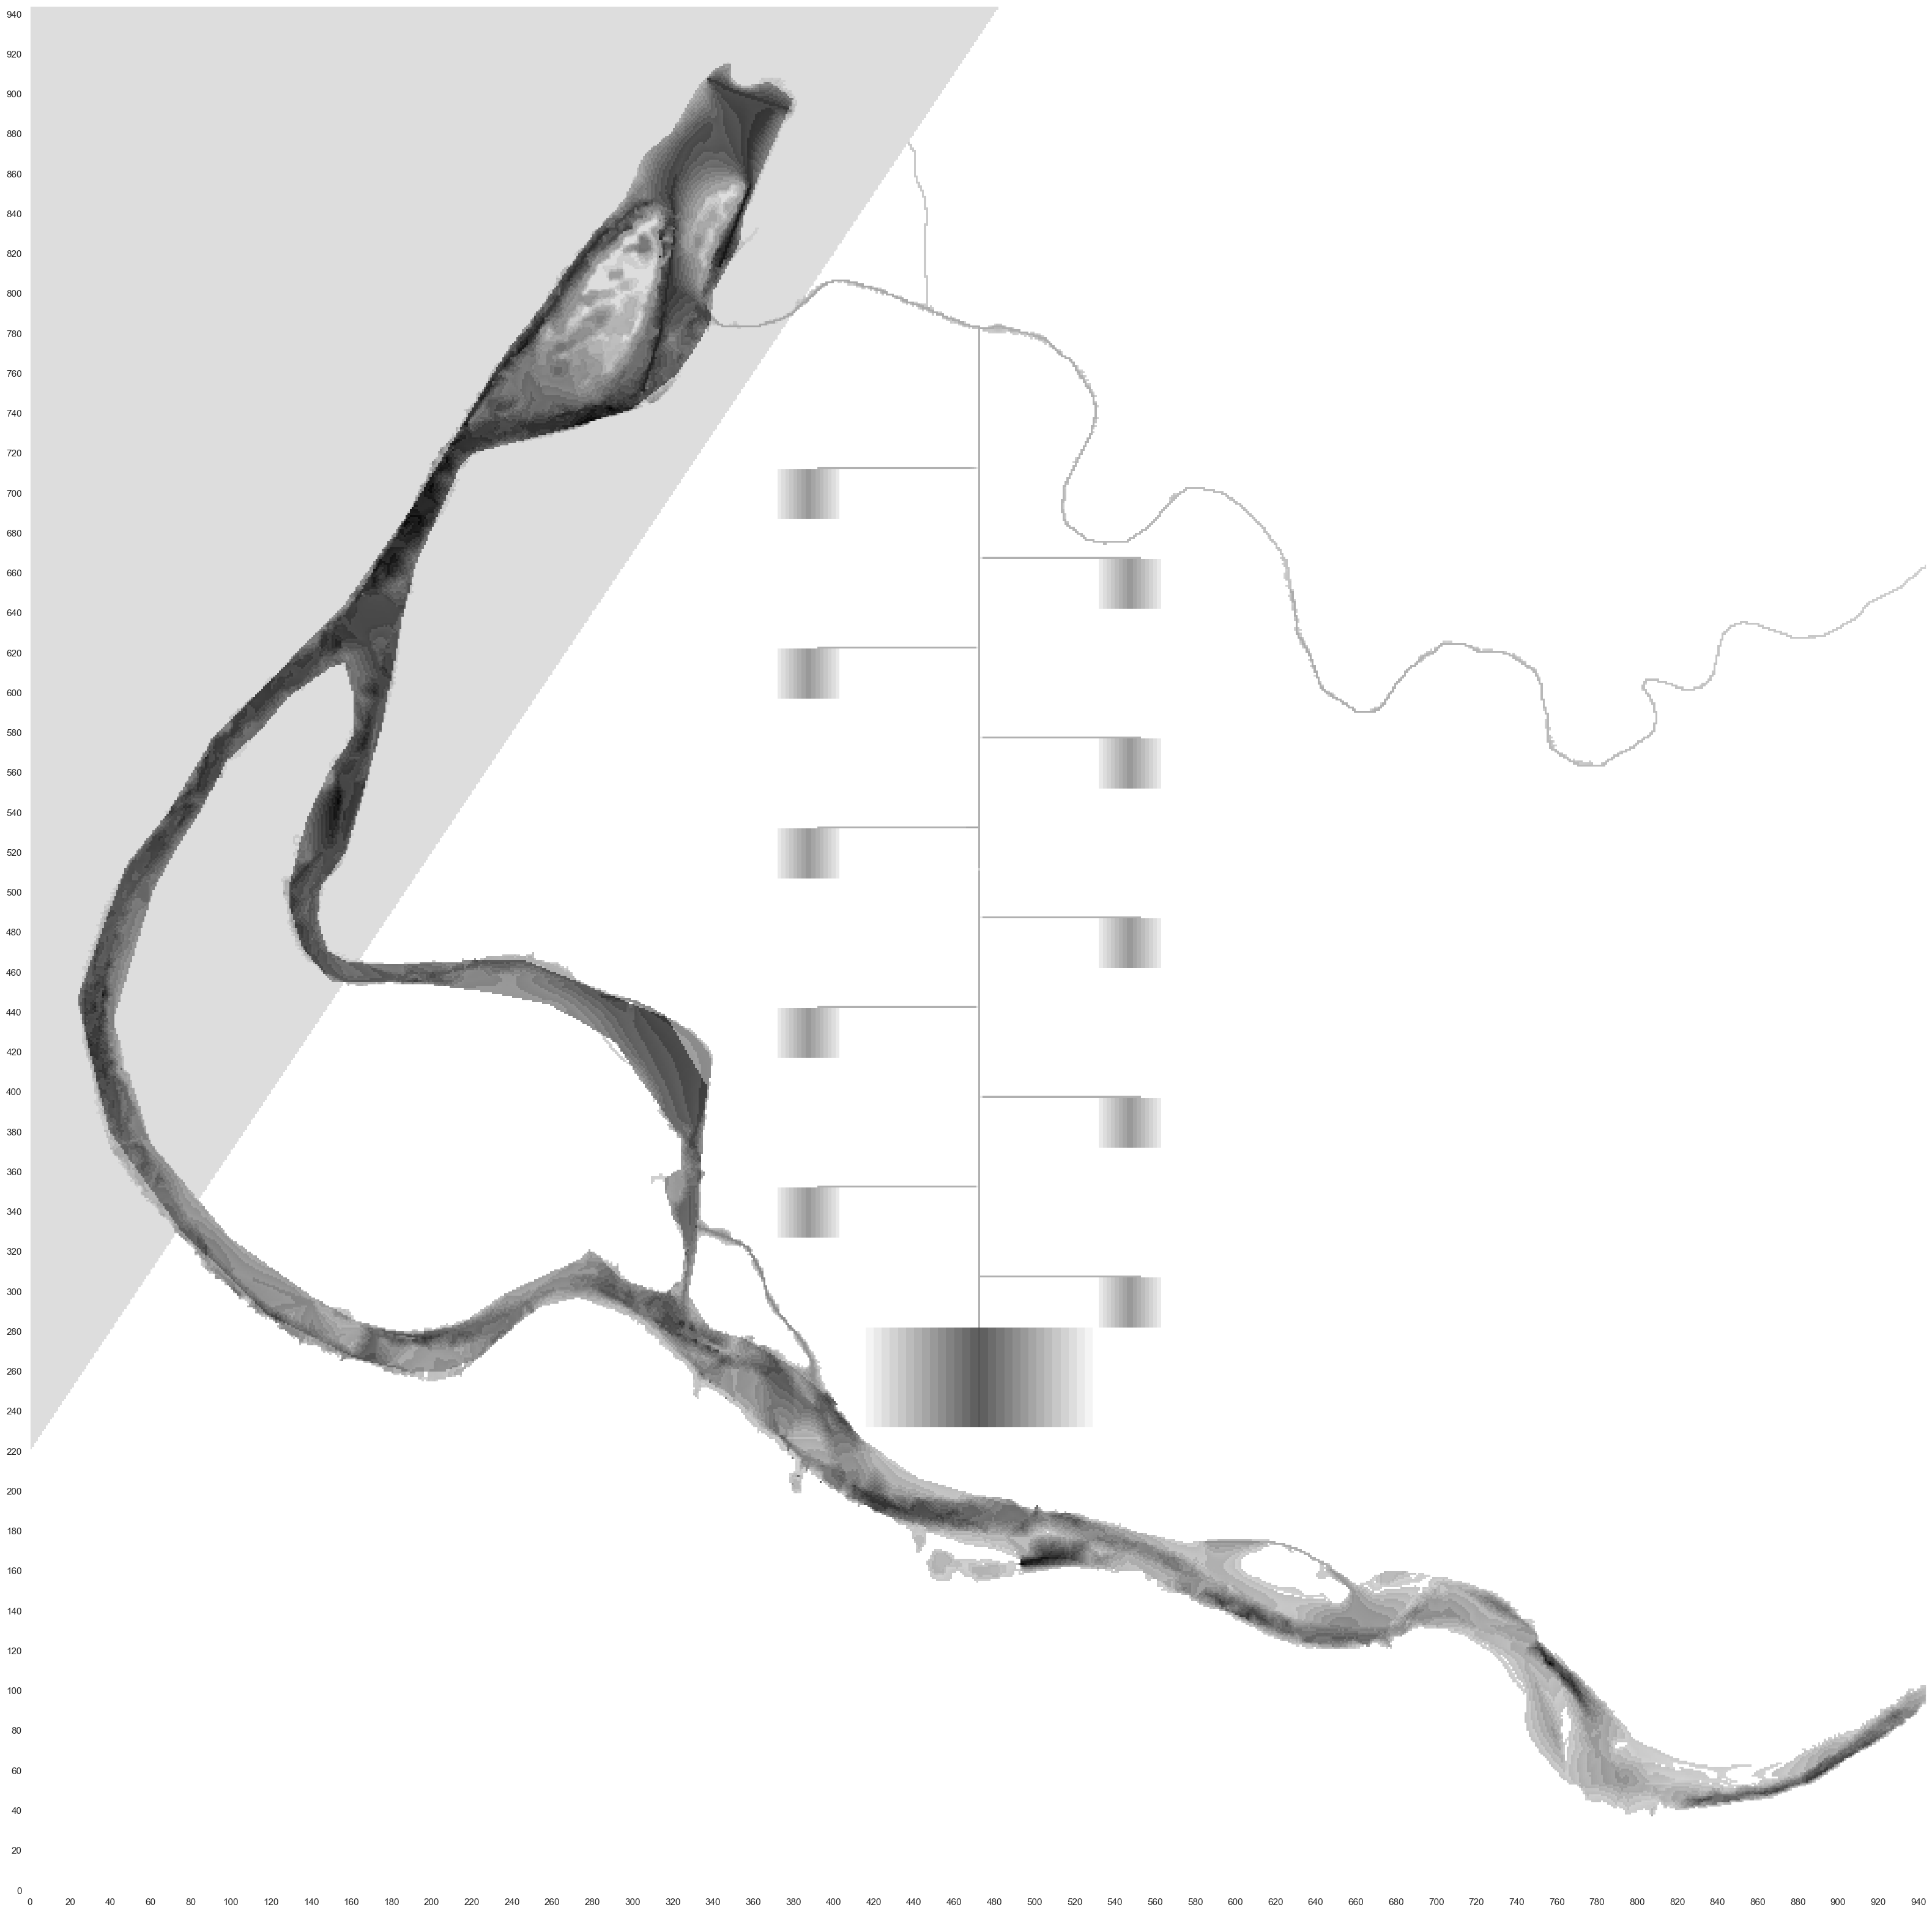

In [46]:
plot_relief(relief5)

In [8]:
from matplotlib.colors import ListedColormap

In [9]:
VAP[VAP > 1000000000] = 0

In [10]:
VAP.max()

58.0

In [71]:
np.where(H0 == 0, relief1, 0)

array([[4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       [4., 4., 4., ..., 4., 4., 4.],
       ...,
       [1., 1., 1., ..., 4., 4., 4.],
       [1., 1., 1., ..., 4., 4., 4.],
       [1., 1., 1., ..., 4., 4., 4.]])

In [75]:
np.where(VAP != 0, np.where(H0 == 0, relief1, 0), np.nan)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [11]:
H1 = ReadFile("Data/raschet/" + 'расчет 2016 relief_model_без_дамб_q_5_18_52дня' + "/H_   14.grd")

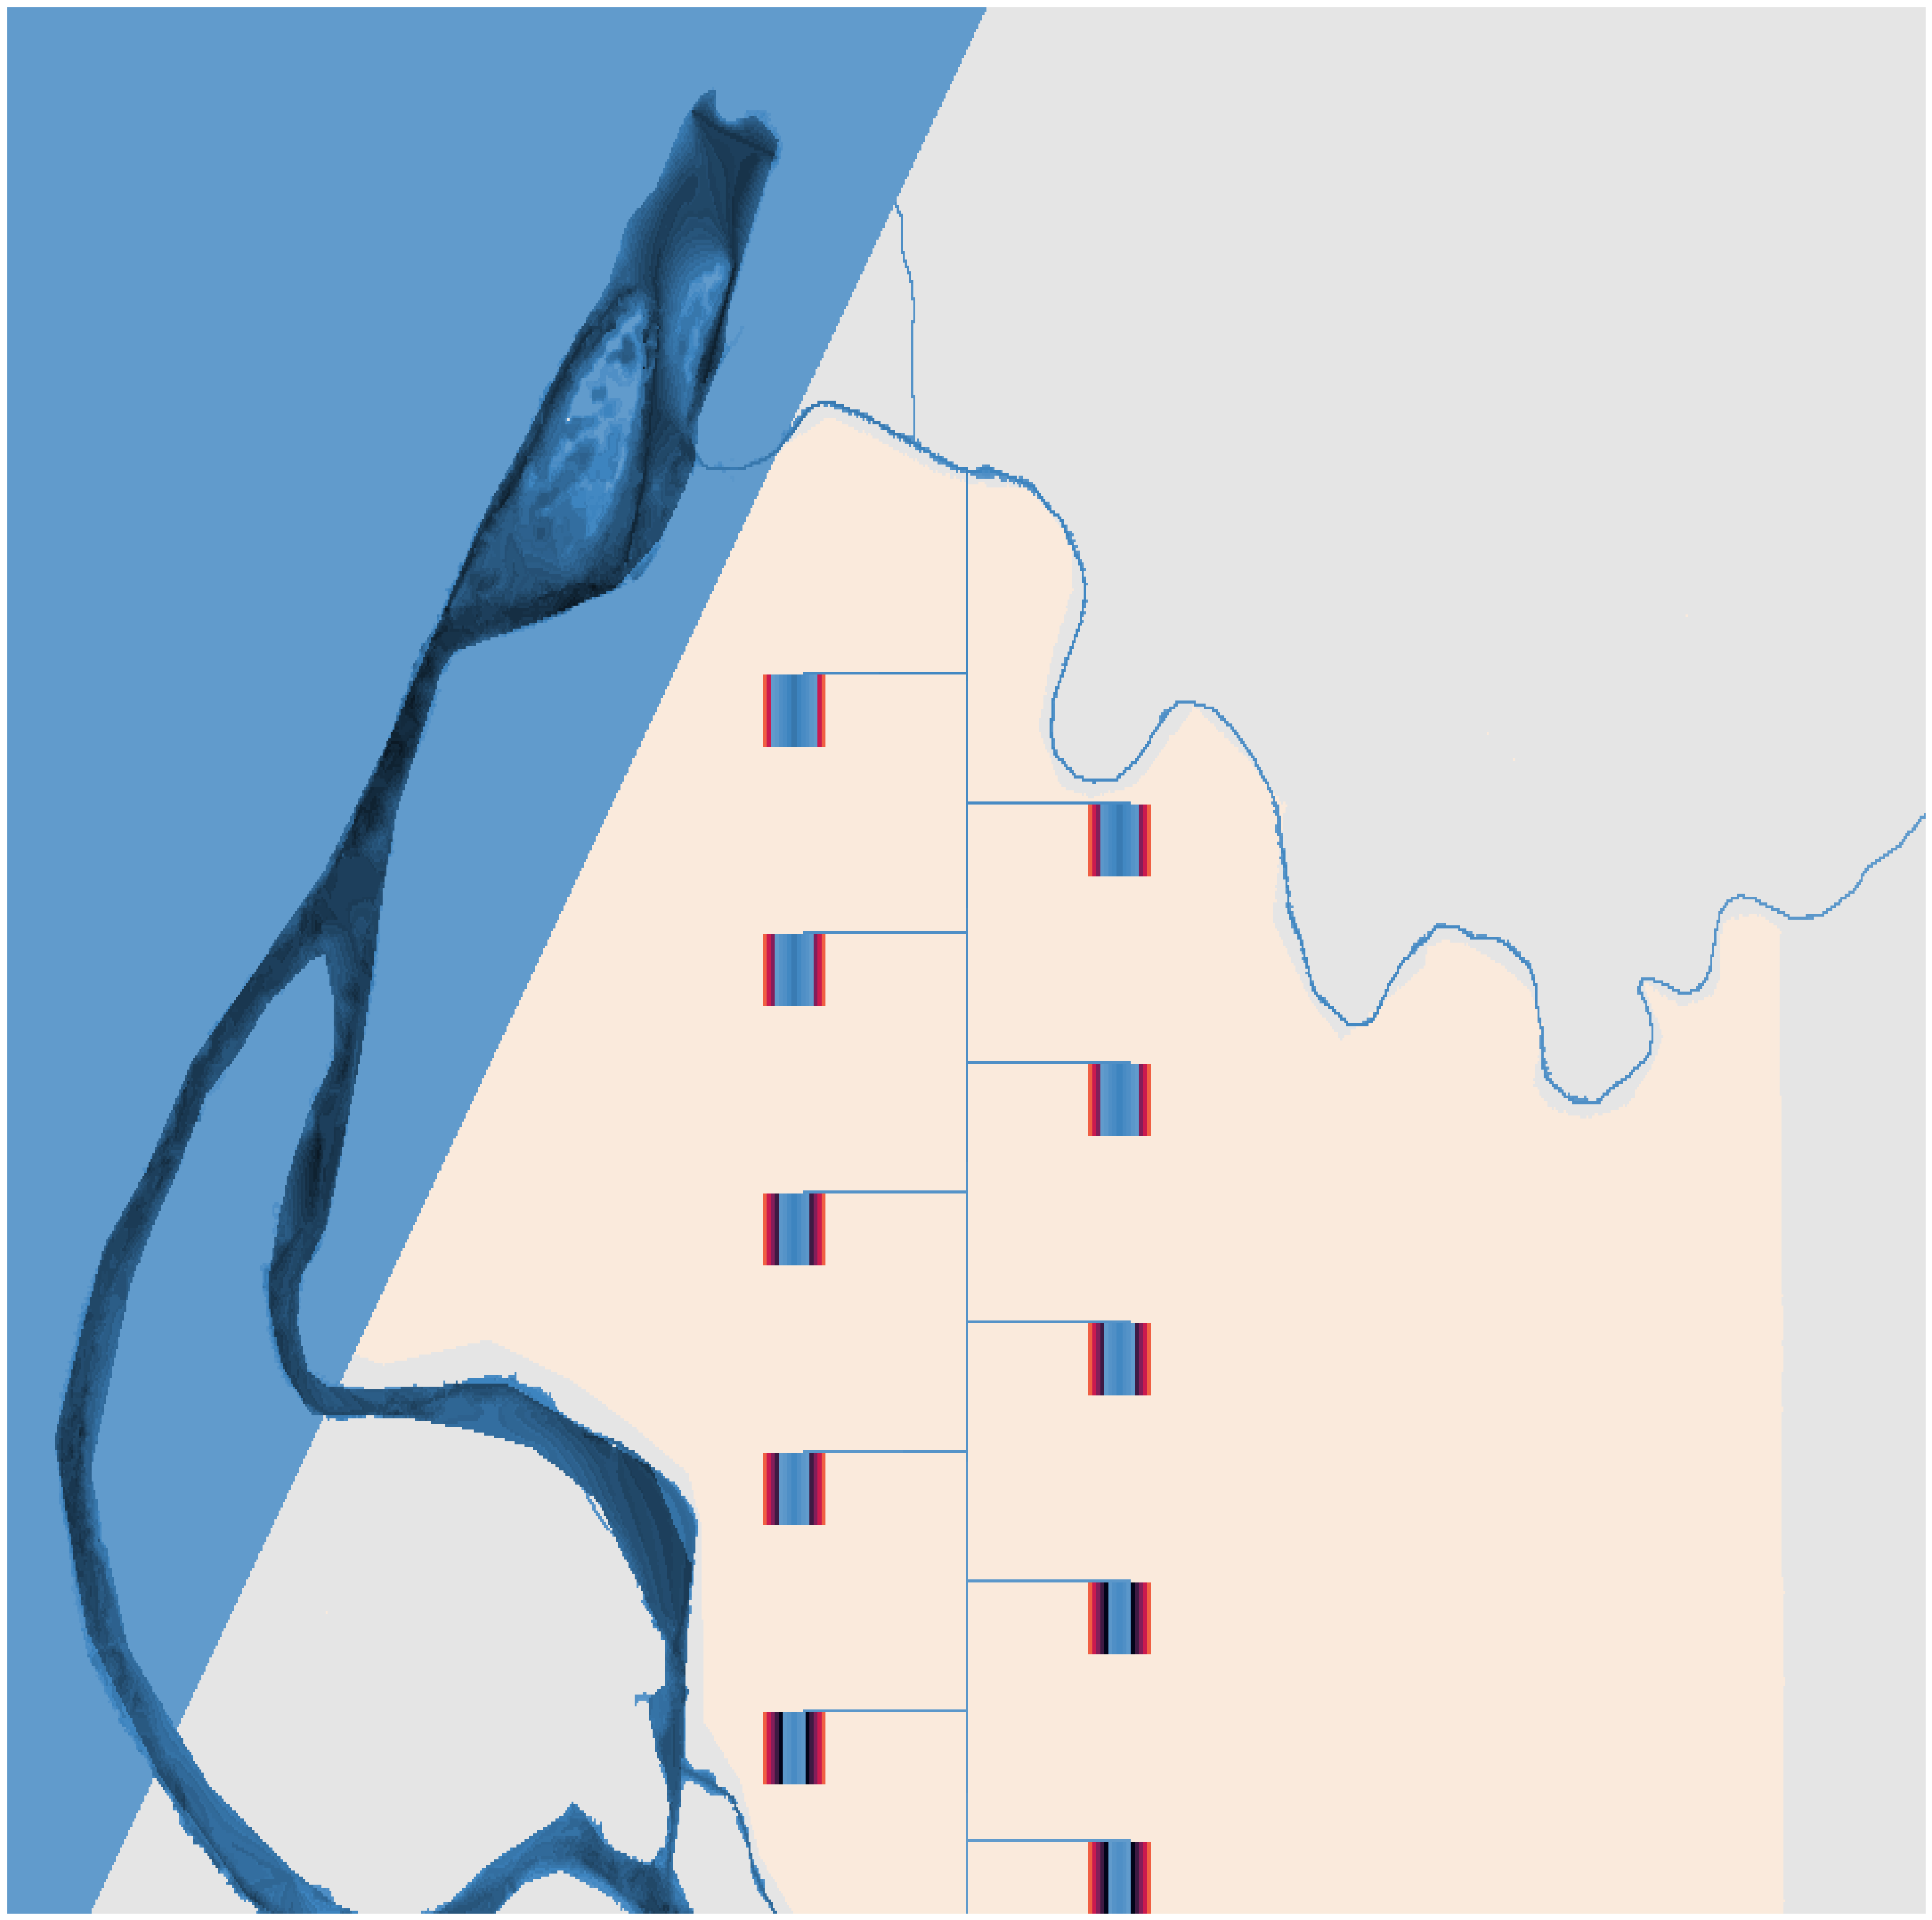

In [14]:
fig, ax = plt.subplots()
extent = [0, 944, 0, 944]
ax.imshow(np.where(VAP != 0, np.where(H1 == 0, relief1, 0), np.nan)[282:, :], extent = extent, origin='lower', aspect='auto')
ax.imshow(np.where(H1 != 0, H1, np.nan)[282:, :], extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
#ax.imshow(np.where(H0 != 0, H0, np.nan), extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
#ax.imshow(np.where(VAP != 0, VAP, np.nan), extent = extent, origin='lower', aspect='auto', cmap=plt.cm.get_cmap('BrBG'))
ax.set_xticks([])
ax.set_yticks([])
fig.set_figwidth(40)    
fig.set_figheight(40)
plt.show()

In [23]:
VAP_rel = np.where(VAP != 0, relief1, np.nan)[282:, :]

In [25]:
def on_move(event):
    if event.inaxes:
        x, y = event.xdata, event.ydata
        print(f"Координаты: x={x:.2f}, y={y:.2f}")

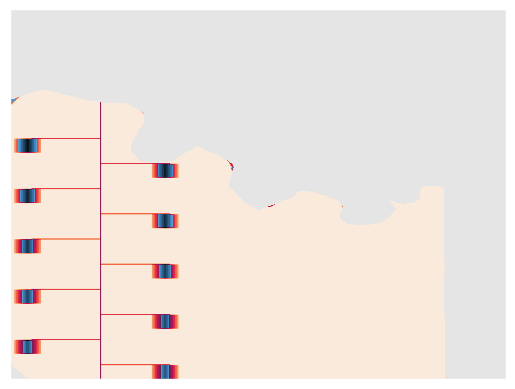

In [51]:
%matplotlib inline
extent = [0, 944, 0, 944]
plt.imshow(np.where(VAP != 0, relief1, np.nan)[282:, 367:], extent = extent, origin='lower', aspect='auto')
plt.imshow(np.where(VAP != 0, np.where(H1 != 0, H1, np.nan), np.nan)[282:, 367:], extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
plt.xticks([])
plt.yticks([])
plt.show()

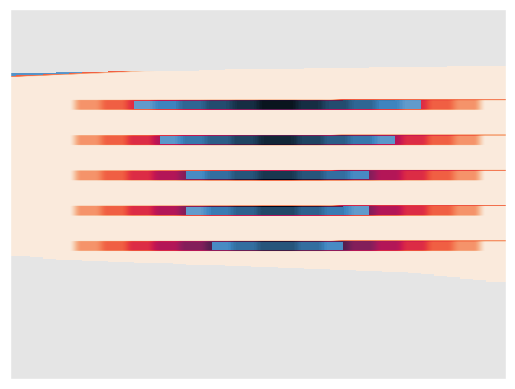

In [60]:
%matplotlib inline
extent = [0, 944, 0, 944]
plt.imshow(np.where(VAP != 0, relief1, np.nan)[:, 367:405], extent = extent, origin='lower', aspect='auto')
plt.imshow(np.where(VAP != 0, np.where(H1 != 0, H1, np.nan), np.nan)[:, 367:405], extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
plt.xticks([])
plt.yticks([])
plt.show()

In [62]:
np.where(VAP != 0, relief1, np.nan)[:, 530:565].shape

(944, 35)

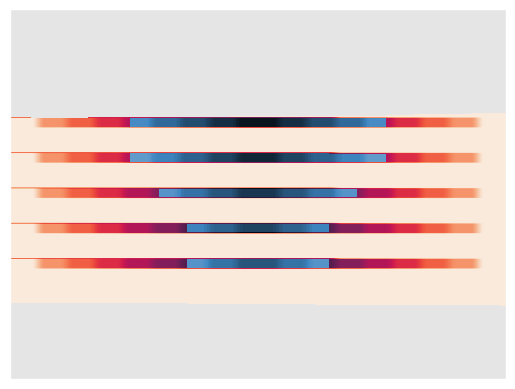

In [61]:
%matplotlib inline
extent = [0, 944, 0, 944]
plt.imshow(np.where(VAP != 0, relief1, np.nan)[:, 530:565], extent = extent, origin='lower', aspect='auto')
plt.imshow(np.where(VAP != 0, np.where(H1 != 0, H1, np.nan), np.nan)[:, 530:565], extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
plt.xticks([])
plt.yticks([])
plt.show()

In [65]:
np.where(VAP != 0, relief1, np.nan)[59:,:][:, 530:565].shape

(885, 35)

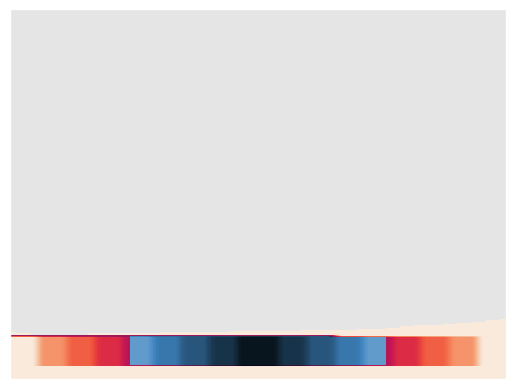

In [66]:
%matplotlib inline
extent = [0, 944, 0, 944]
plt.imshow(np.where(VAP != 0, relief1, np.nan)[631:, 530:565], extent = extent, origin='lower', aspect='auto')
plt.imshow(np.where(VAP != 0, np.where(H1 != 0, H1, np.nan), np.nan)[631:, 530:565], extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
631 530 440 355 283

In [ ]:
665 572 493 400 316

In [ ]:
%matplotlib inline
extent = [0, 944, 0, 944]
plt.imshow(np.where(VAP != 0, relief1, np.nan)[:, 367:405], extent = extent, origin='lower', aspect='auto')
plt.imshow(np.where(VAP != 0, np.where(H1 != 0, H1, np.nan), np.nan)[:, 367:405], extent = extent, origin='lower', aspect='auto', cmap=mcolors.ListedColormap(blue))
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
72, 372 70, 404

In [ ]:
np.where(VAP != 0, np.where(H1 == 0, relief1, 0), np.nan)[282:, :]

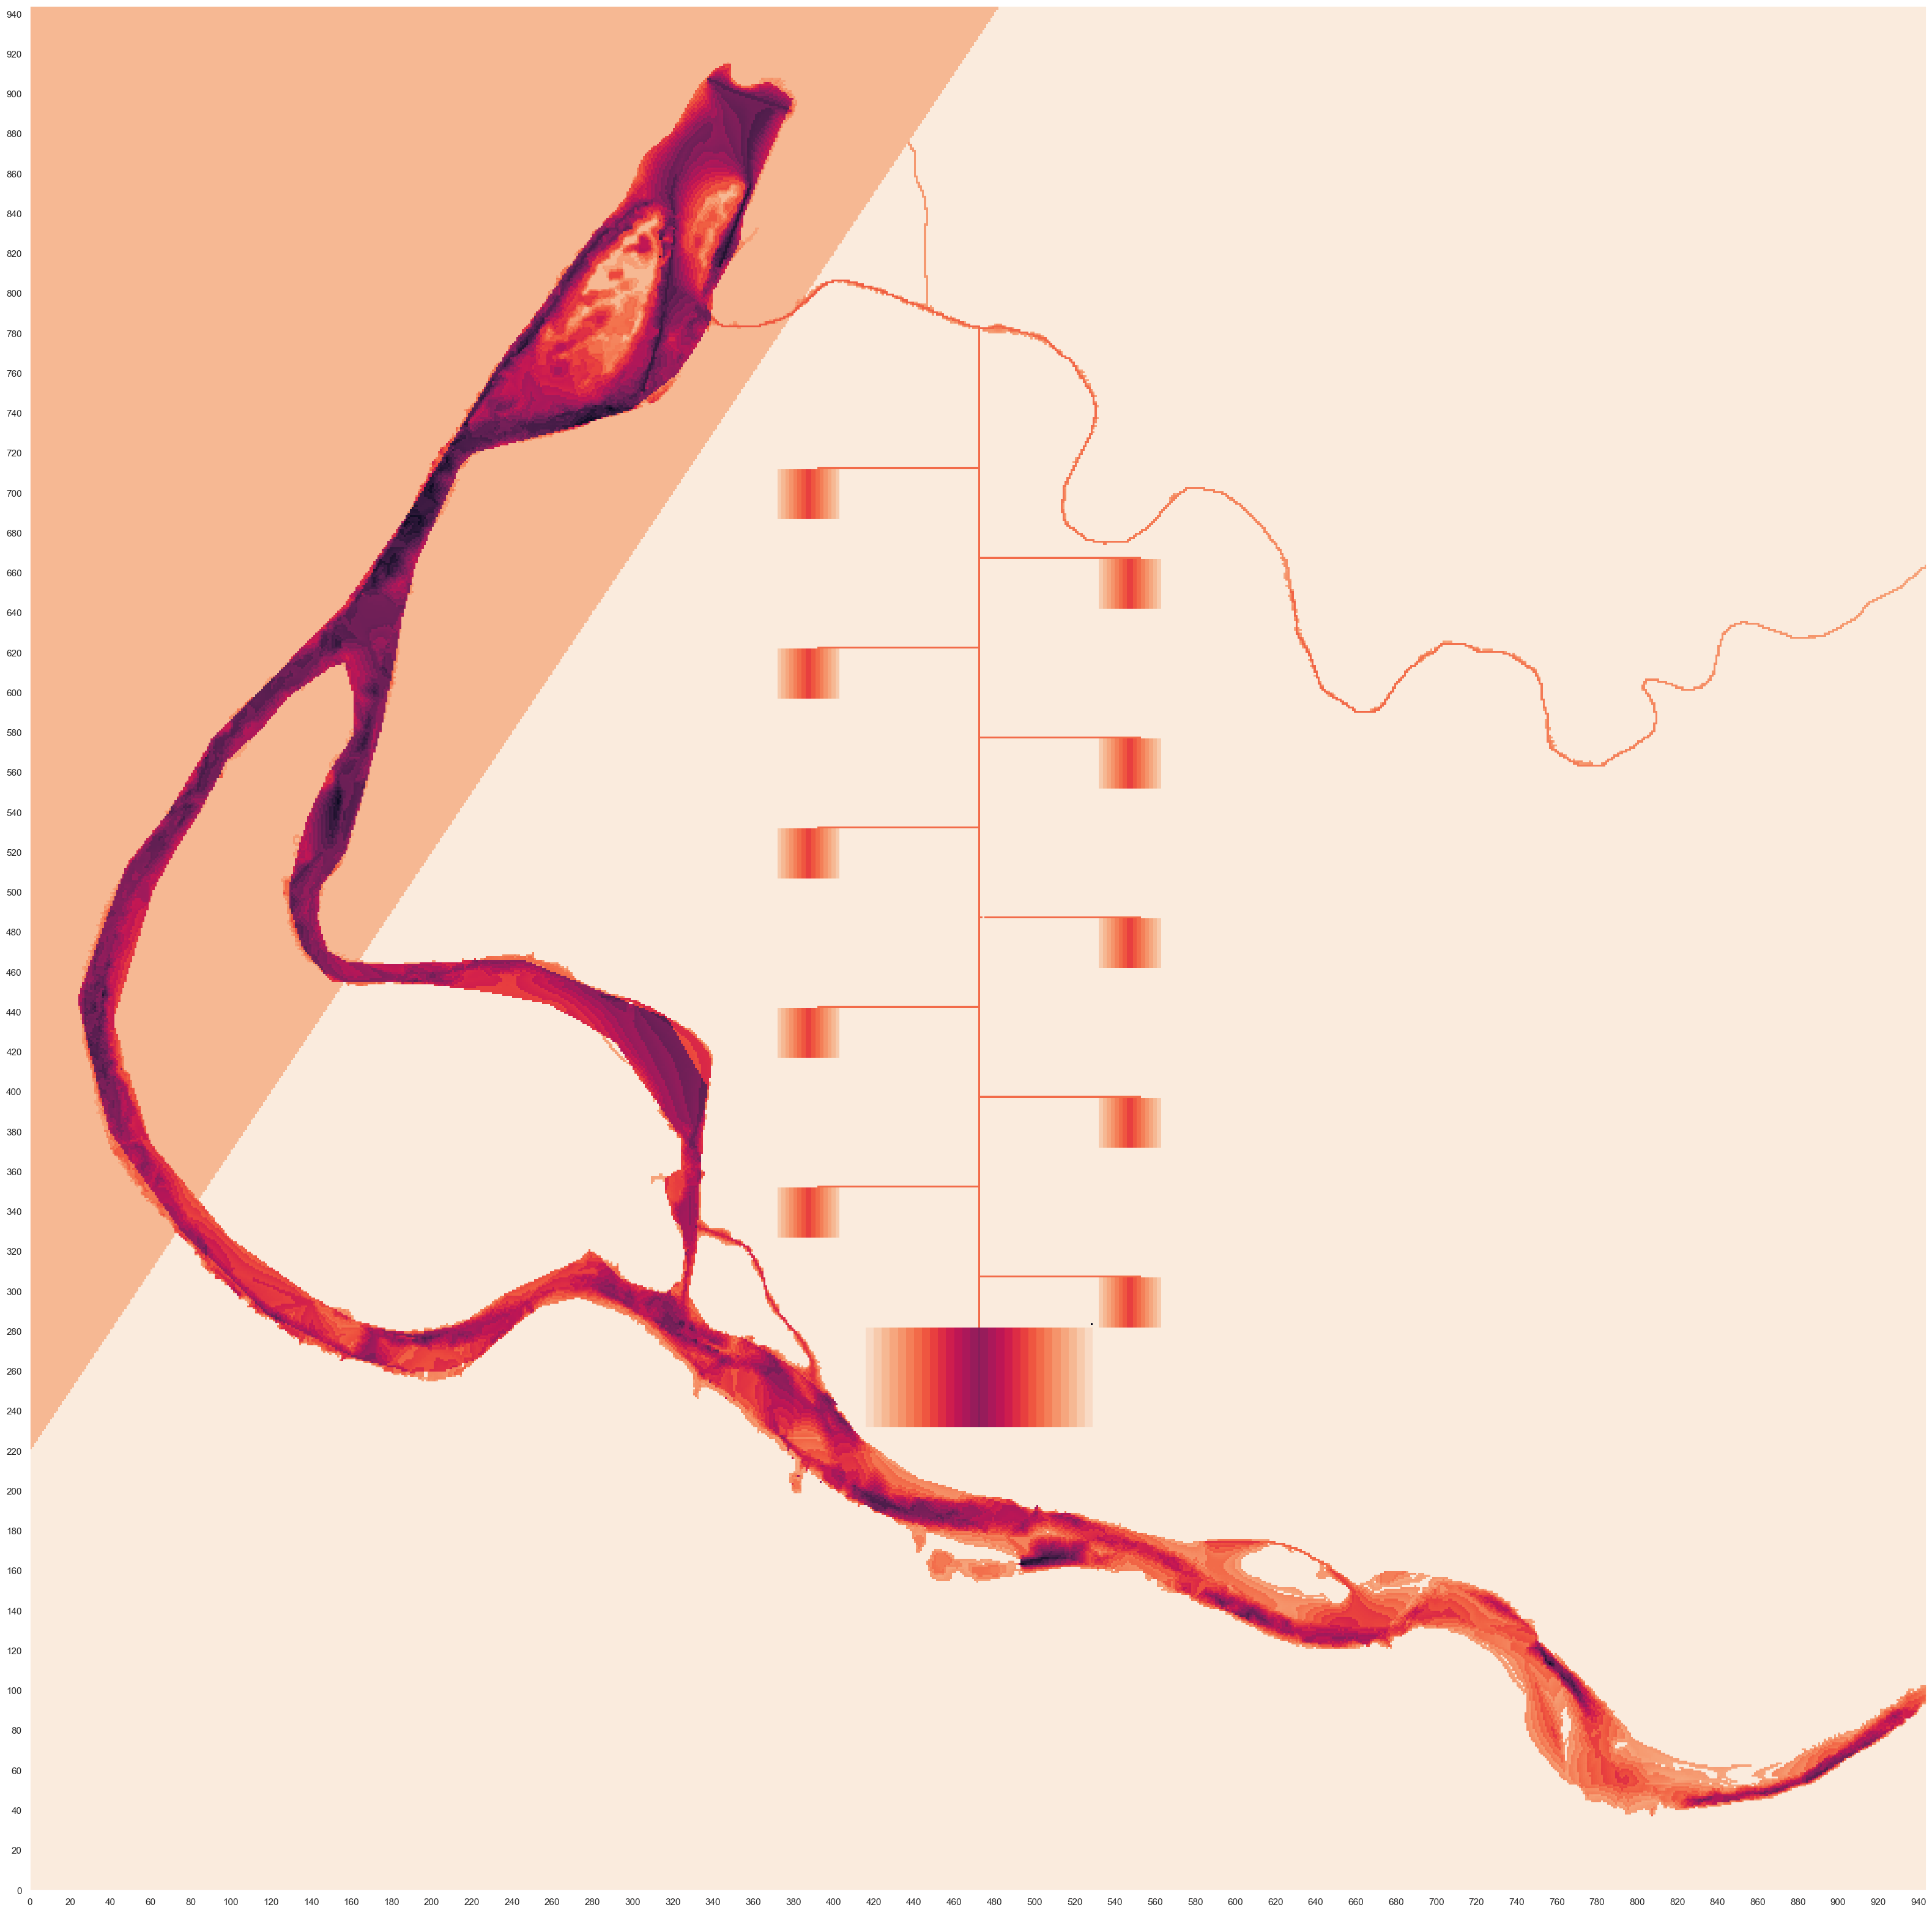

In [47]:
extent = [0, width, 0, height]fig, ax = plt.subplots()
from matplotlib.colors import ListedColormap

# Создаем цветовую карту 'binary' и изменяем порядок цветов
binary_cmap = plt.cm.get_cmap('binary')
new_binary_colors = list(binary_cmap(np.linspace(0, 1, binary_cmap.N))[::-1])
new_binary_cmap = ListedColormap(new_binary_colors, name='new_binary')
a = ax.pcolormesh(relief)
A = np.zeros([944, 944])
A[283, 528] = 1
c = ax.pcolormesh(np.where((A != 0), A, np.nan))
# d = ax.pcolormesh(np.where((VAP35 == 0), 0, np.nan))
#a = ax.pcolormesh(relief0)
#b = ax.pcolormesh(np.where(H != 0, H, np.nan), cmap=mcolors.ListedColormap(blue))
# ax.pcolormesh(np.where(rusla != 0, rusla, np.nan))
# ax.pcolormesh(np.where(A != 0, A, np.nan), cmap=mcolors.ListedColormap('#FF0000'))
# rusla[581, 810]
# rusla[575, 806]
# rusla[616, 736]
# rusla[590, 668]
# rusla[589, 664]
# rusla[717, 519]
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
# fig.colorbar(a)
# fig.colorbar(b)
fig.set_figwidth(40)    
fig.set_figheight(40)
plt.show()

In [21]:
def plot_relief(rel):
    fig, ax = plt.subplots()
    from matplotlib.colors import ListedColormap

    binary_cmap = plt.cm.get_cmap('binary')
    new_binary_colors = list(binary_cmap(np.linspace(0, 1, binary_cmap.N))[::-1])
    new_binary_cmap = ListedColormap(new_binary_colors, name='new_binary')
    a = ax.pcolormesh(rel, cmap=new_binary_cmap)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

    ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

    ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
    fig.set_figwidth(40)    
    fig.set_figheight(40)
    plt.show()

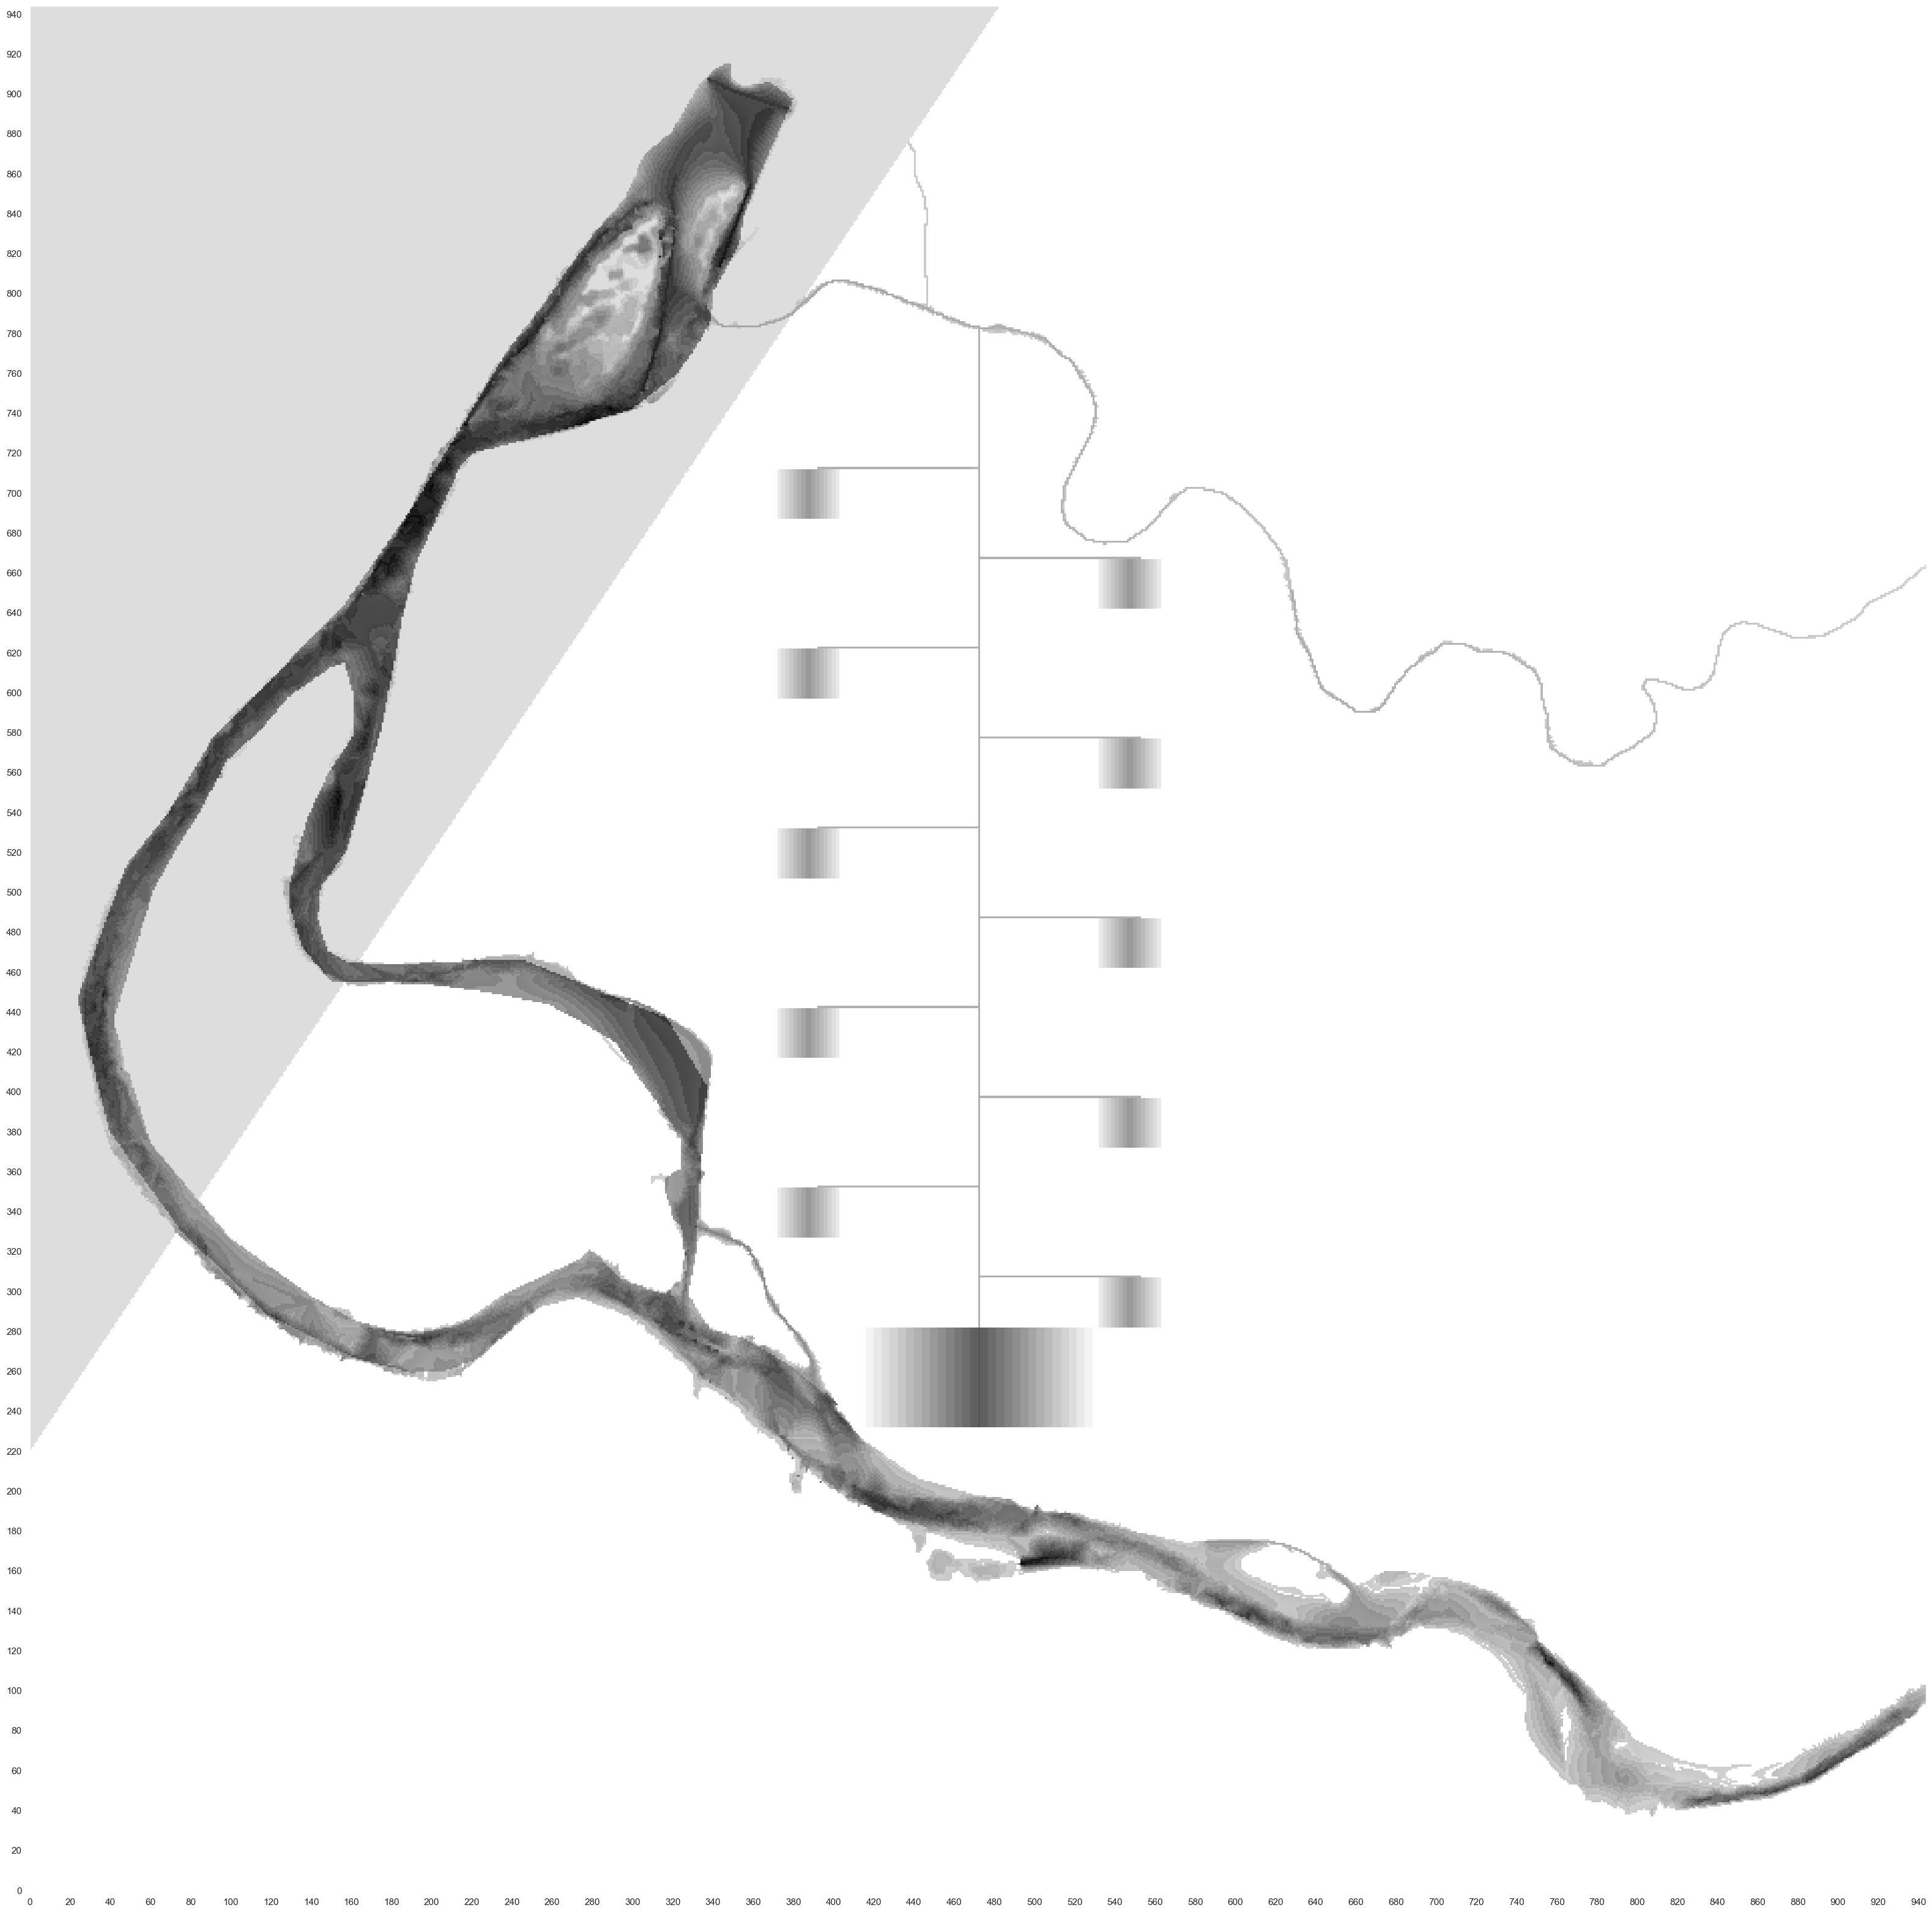

In [23]:
plot_relief(relief2)

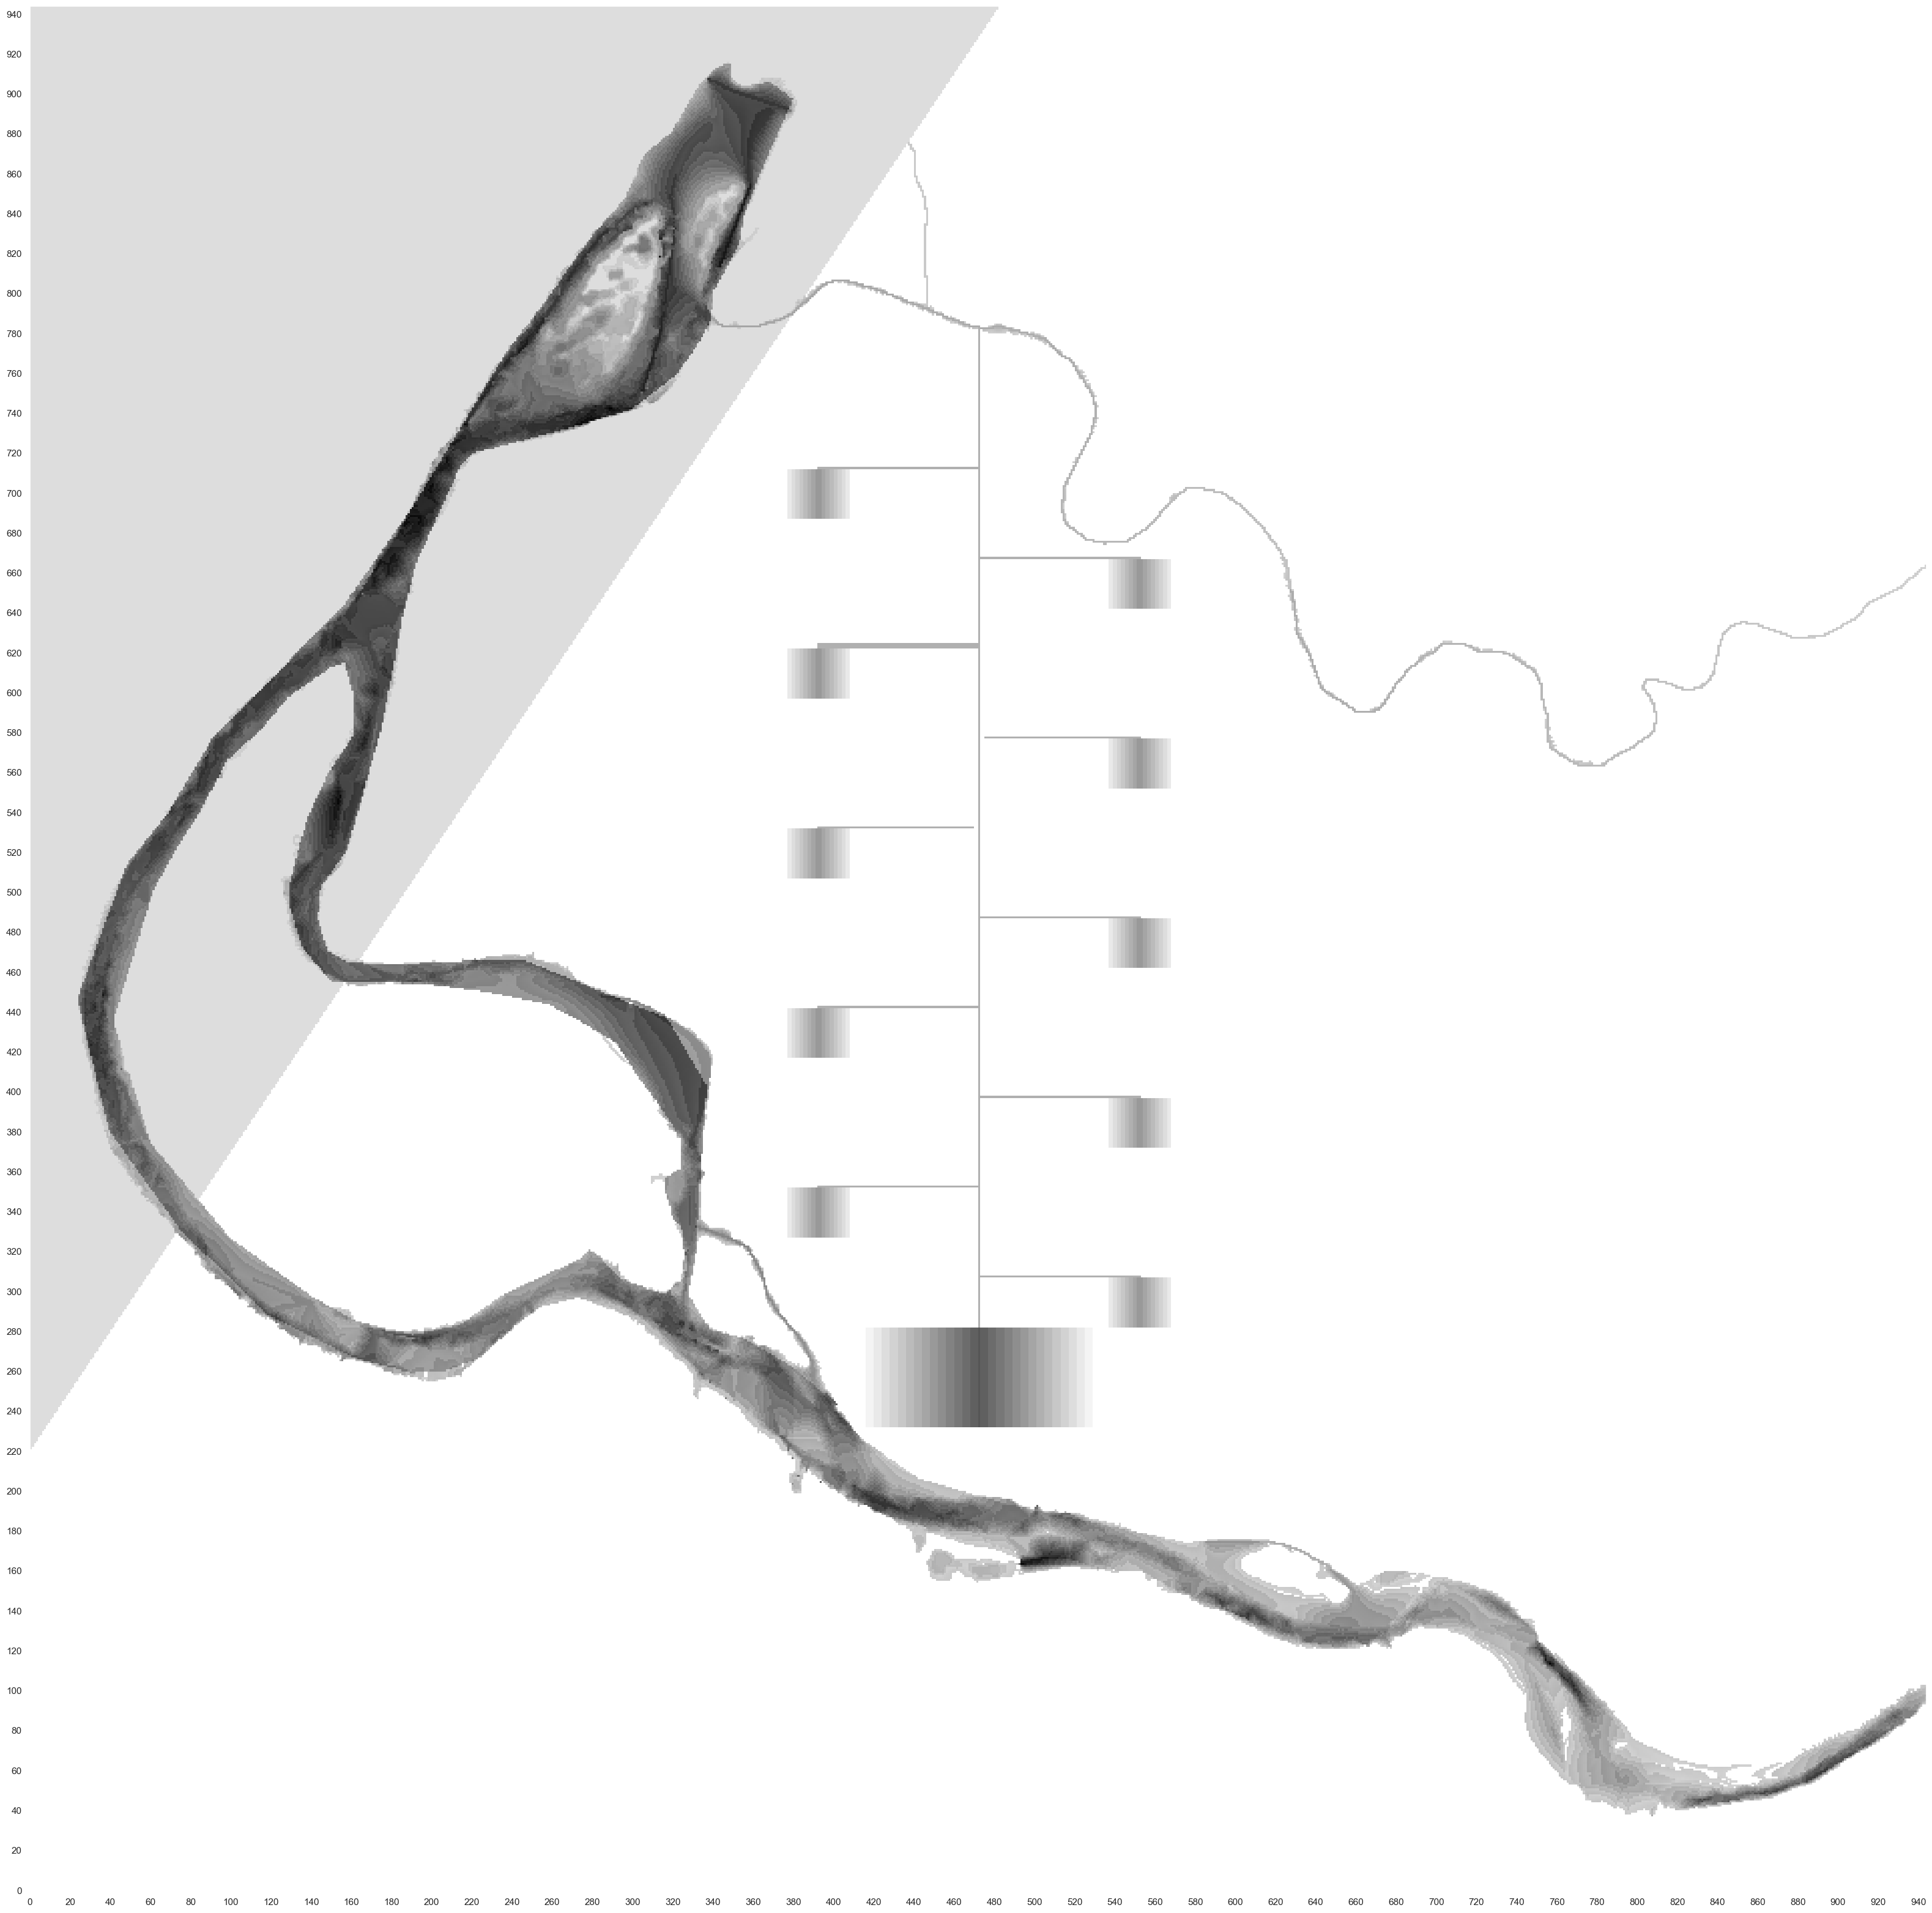

In [24]:
plot_relief(relief3)

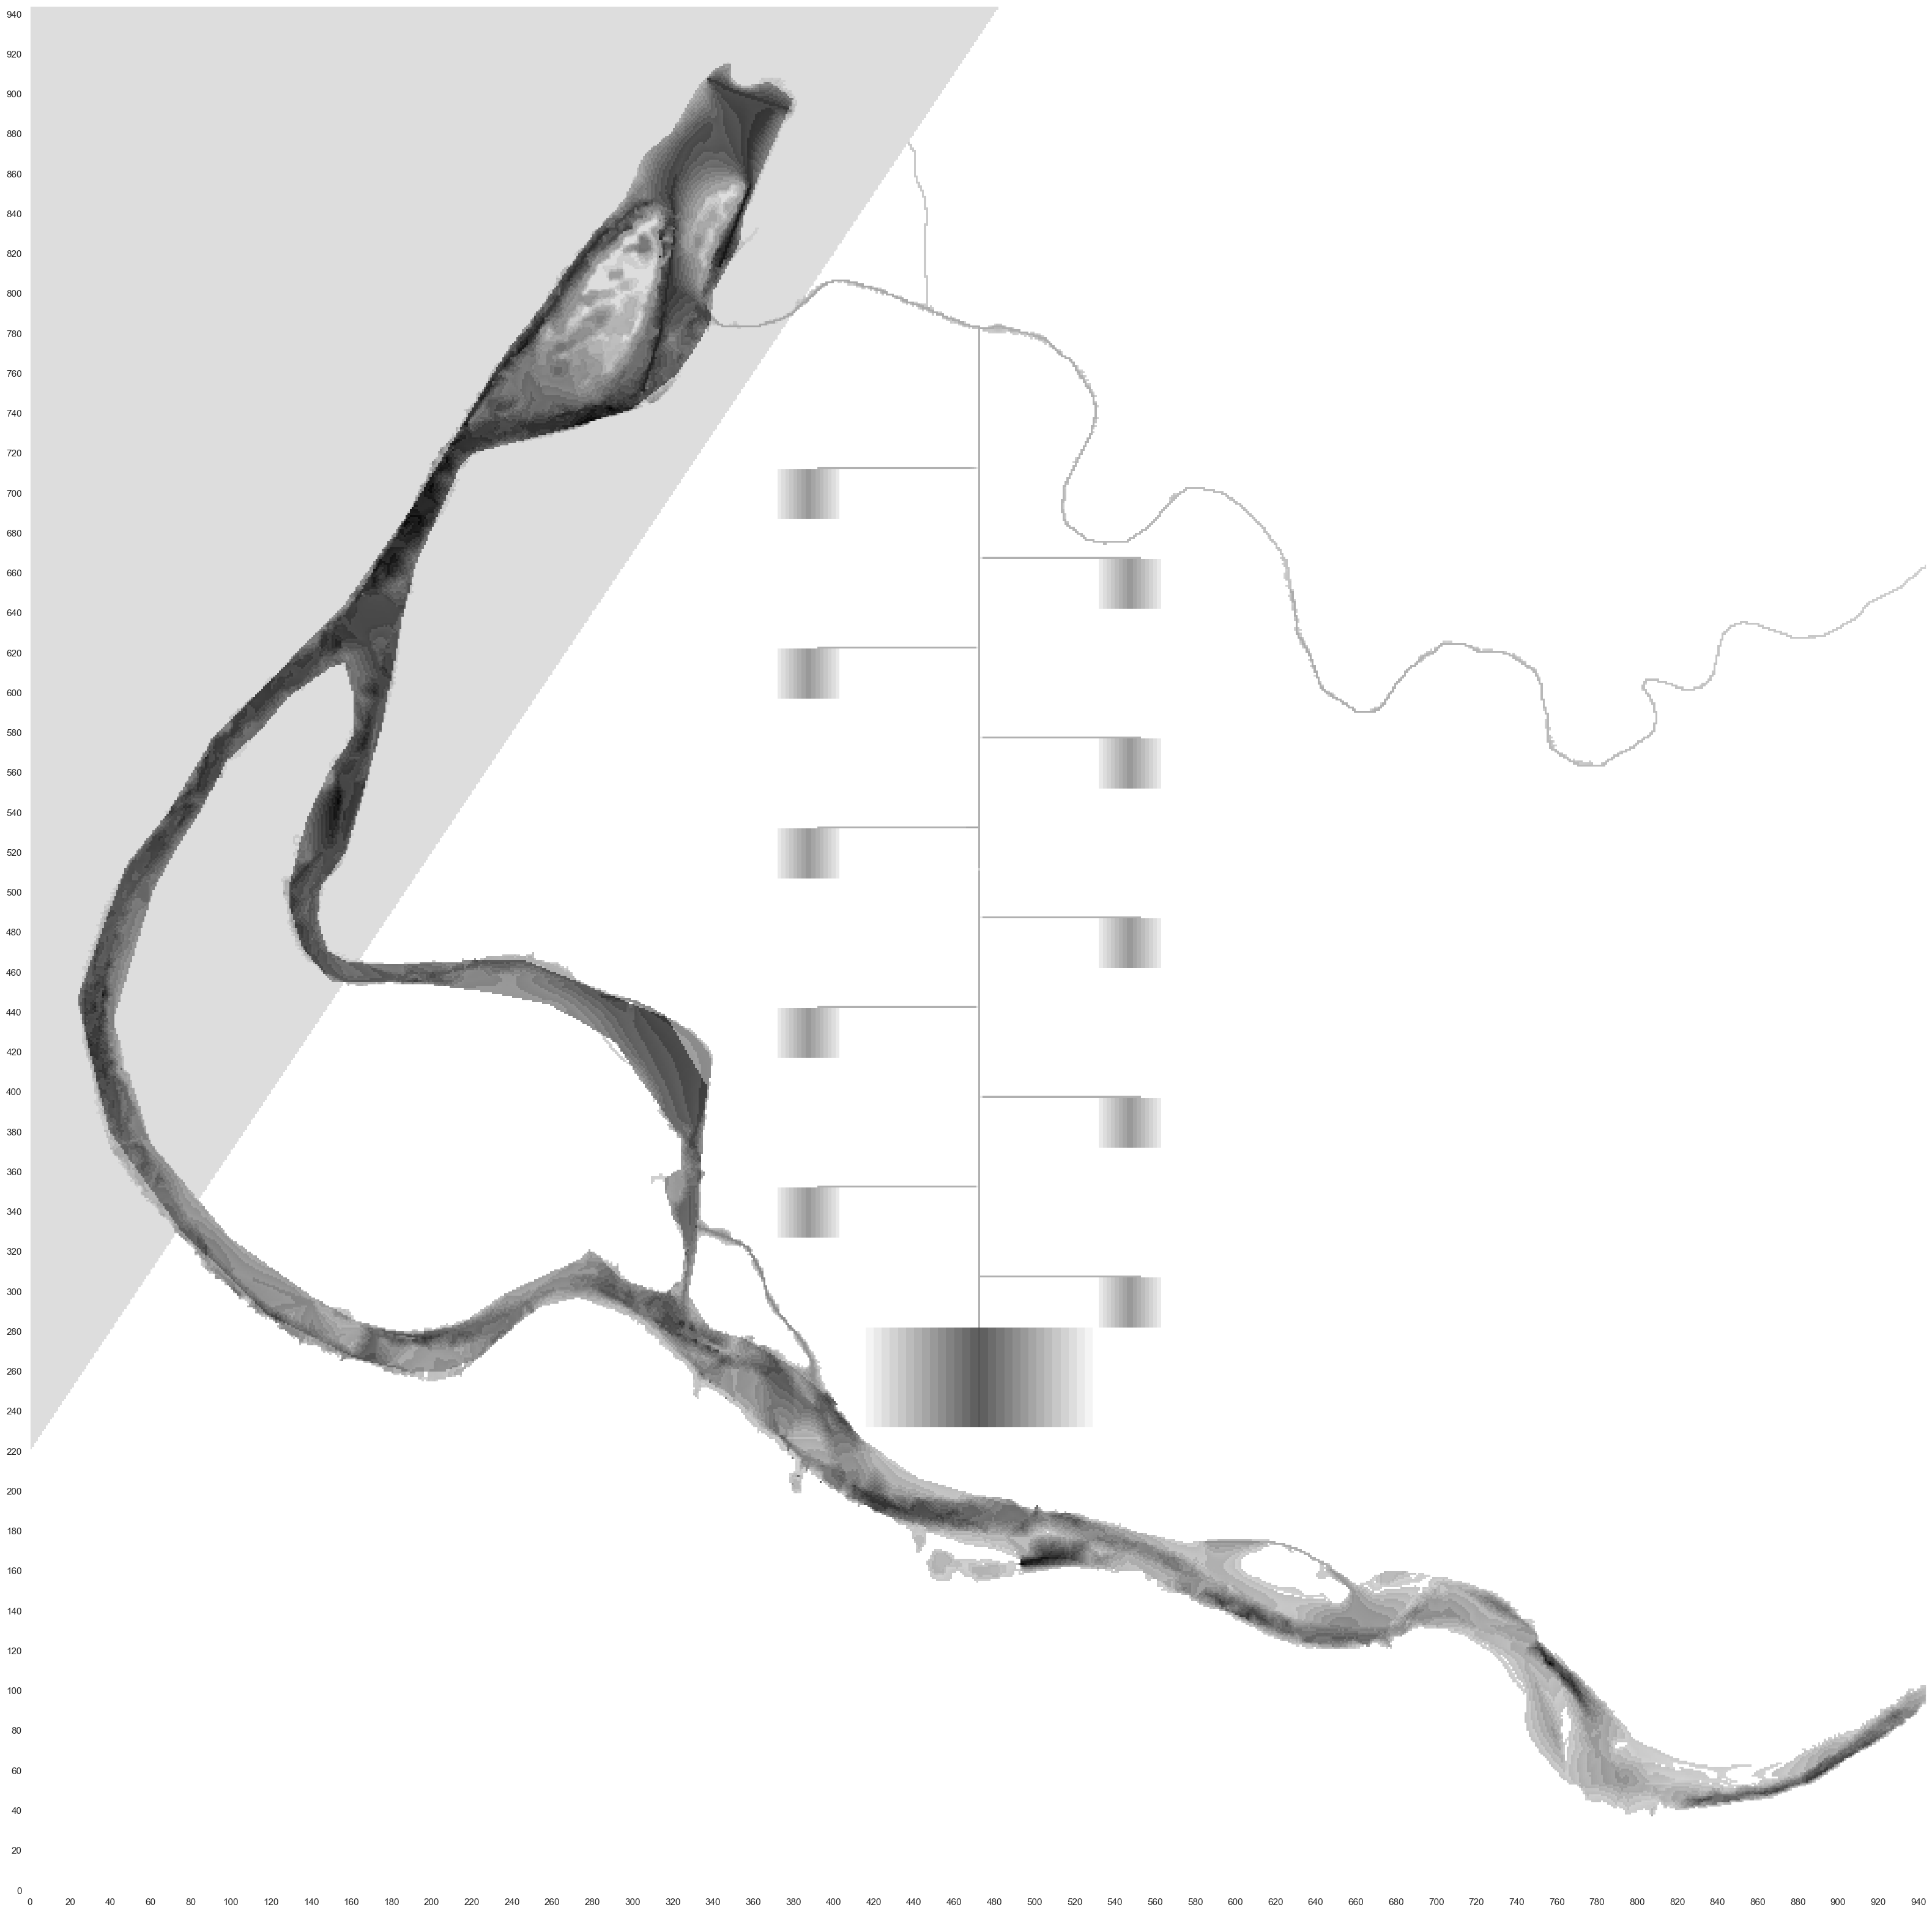

In [25]:
plot_relief(relief4)

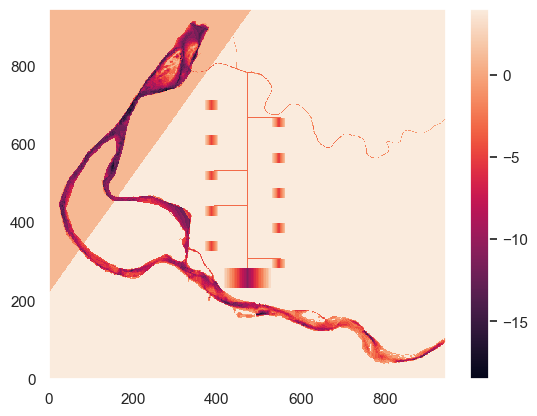

In [44]:
plt.pcolormesh(relief2)
plt.colorbar()

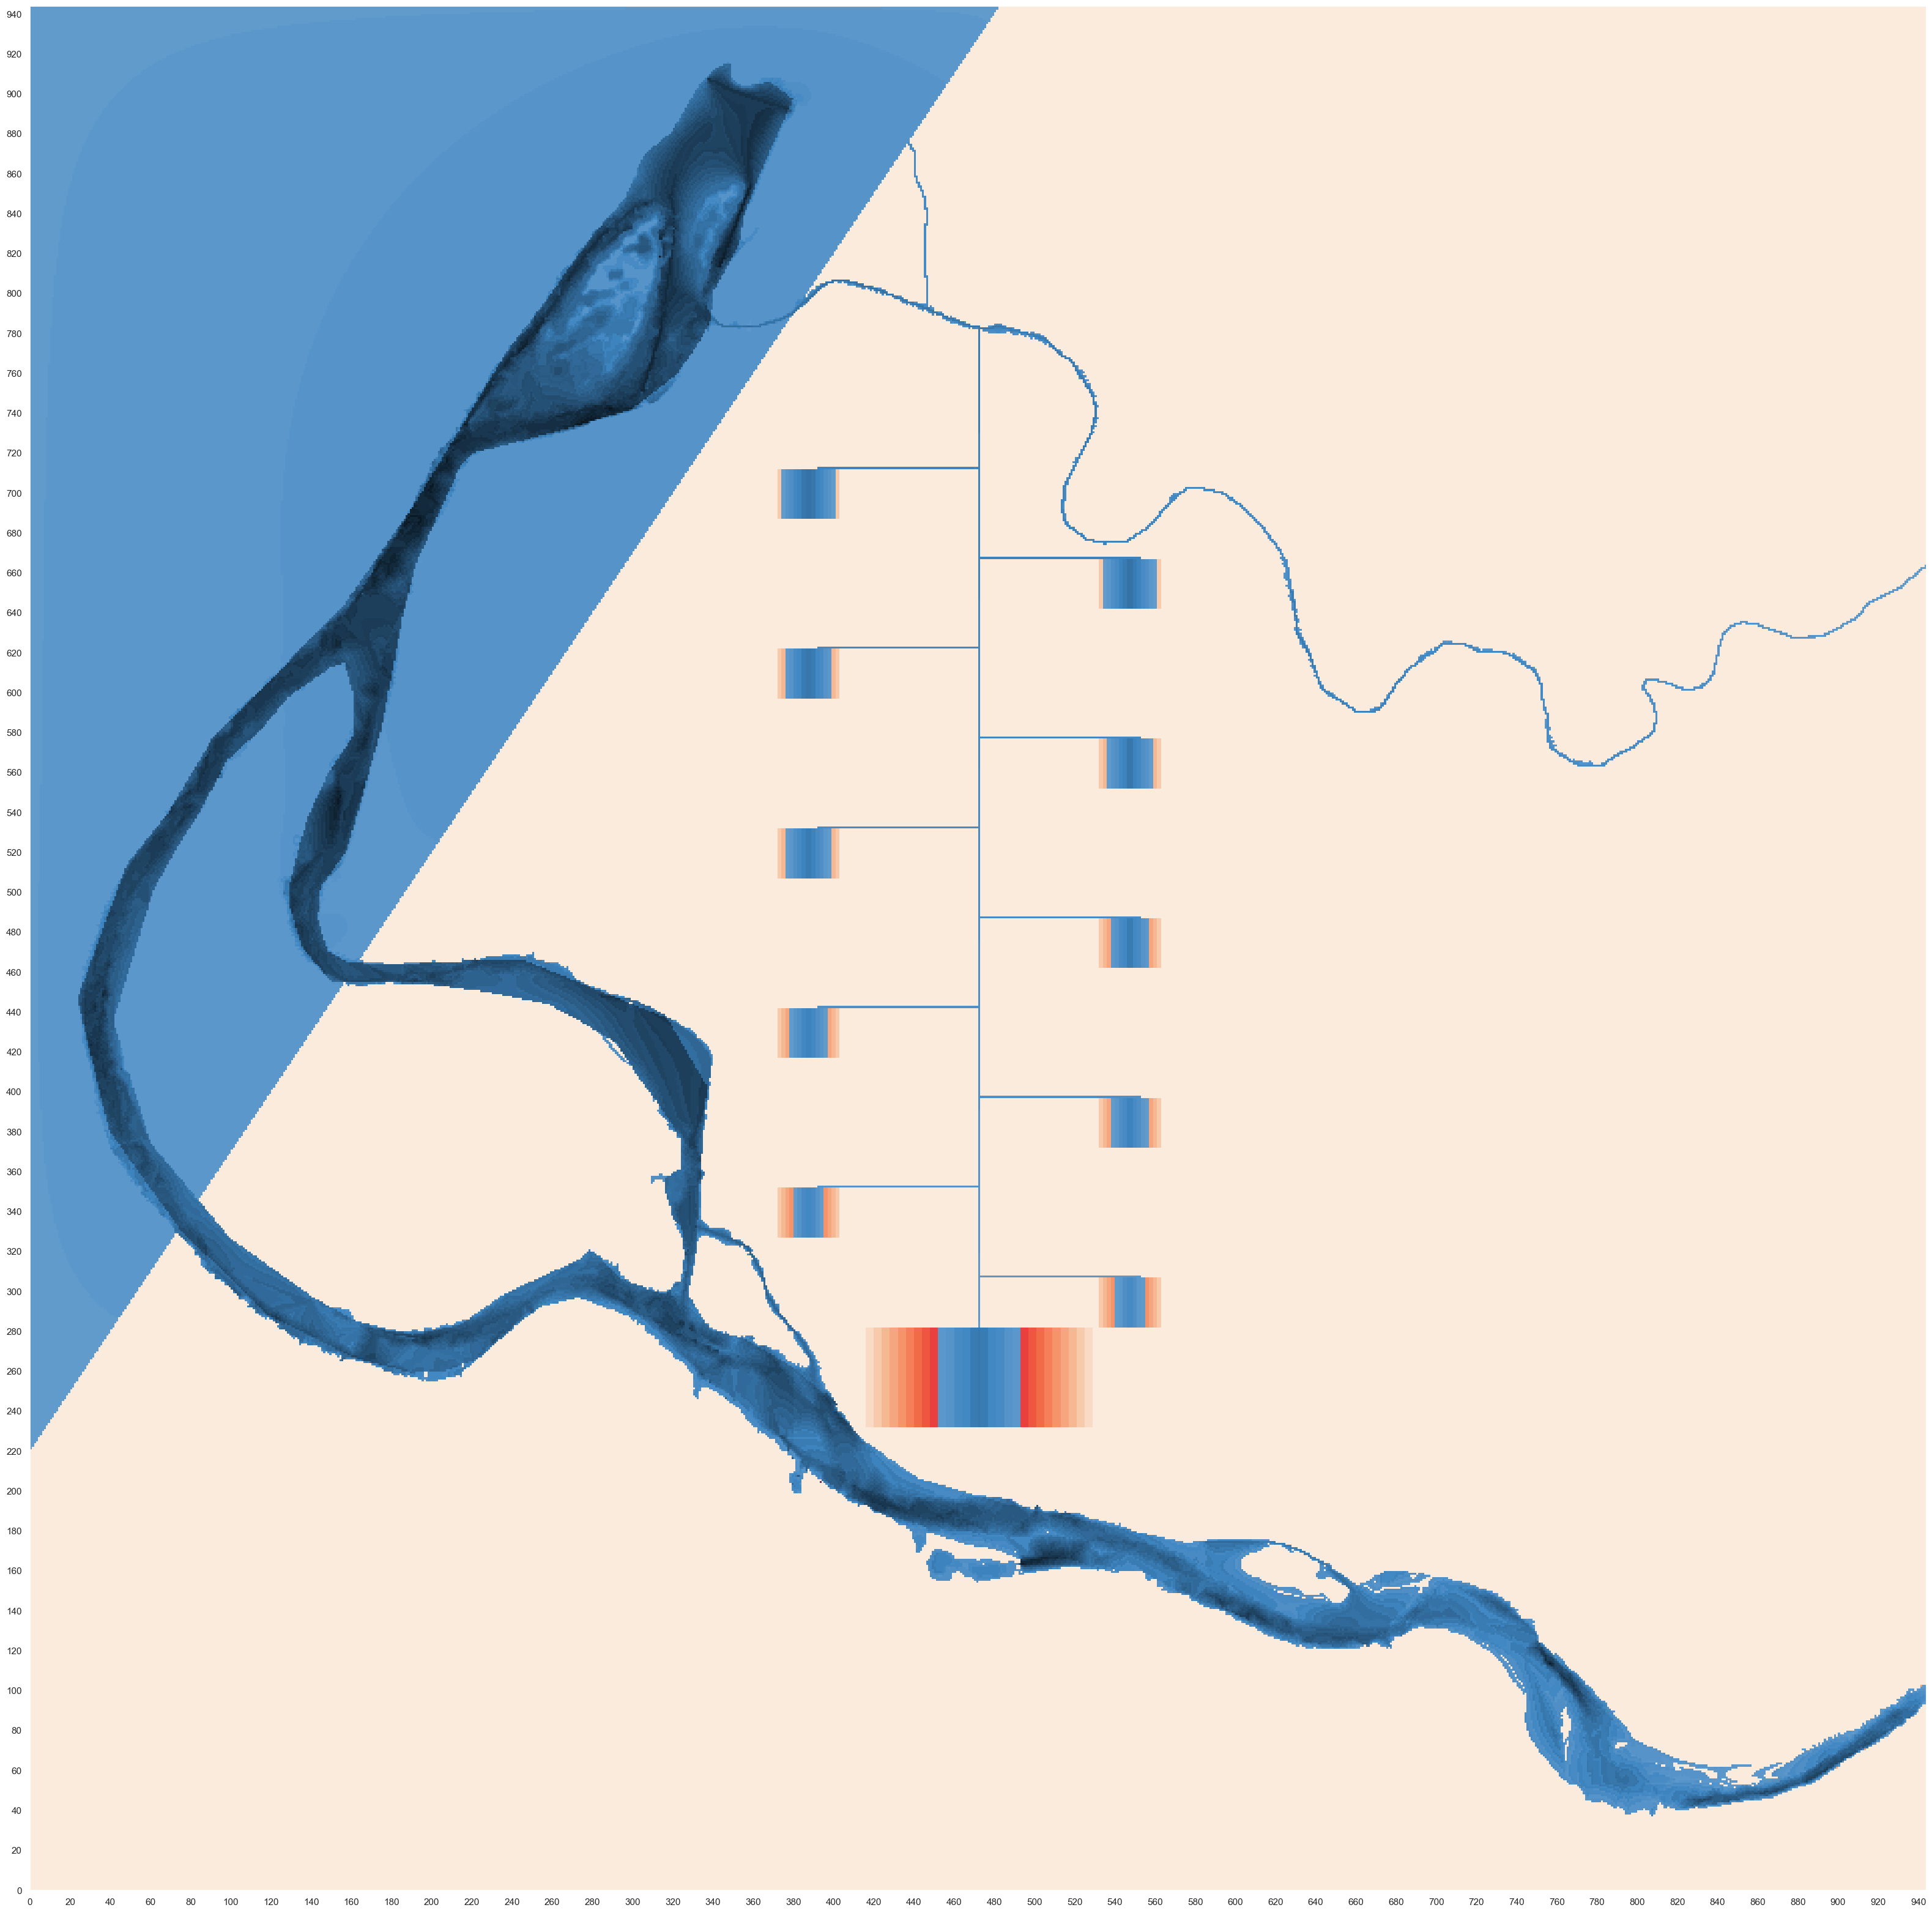

In [56]:
fig, ax = plt.subplots()
a = ax.pcolormesh(relief2)
b = ax.pcolormesh(np.where(H != 0, H, np.nan), cmap=mcolors.ListedColormap(blue))
# ax.pcolormesh(np.where(rusla != 0, rusla, np.nan))
# ax.pcolormesh(np.where(A != 0, A, np.nan), cmap=mcolors.ListedColormap('#FF0000'))
# rusla[581, 810]
# rusla[575, 806]
# rusla[616, 736]
# rusla[590, 668]
# rusla[589, 664]
# rusla[717, 519]
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
# fig.colorbar(a)
# fig.colorbar(b)
fig.set_figwidth(40)    
fig.set_figheight(40)
plt.show()

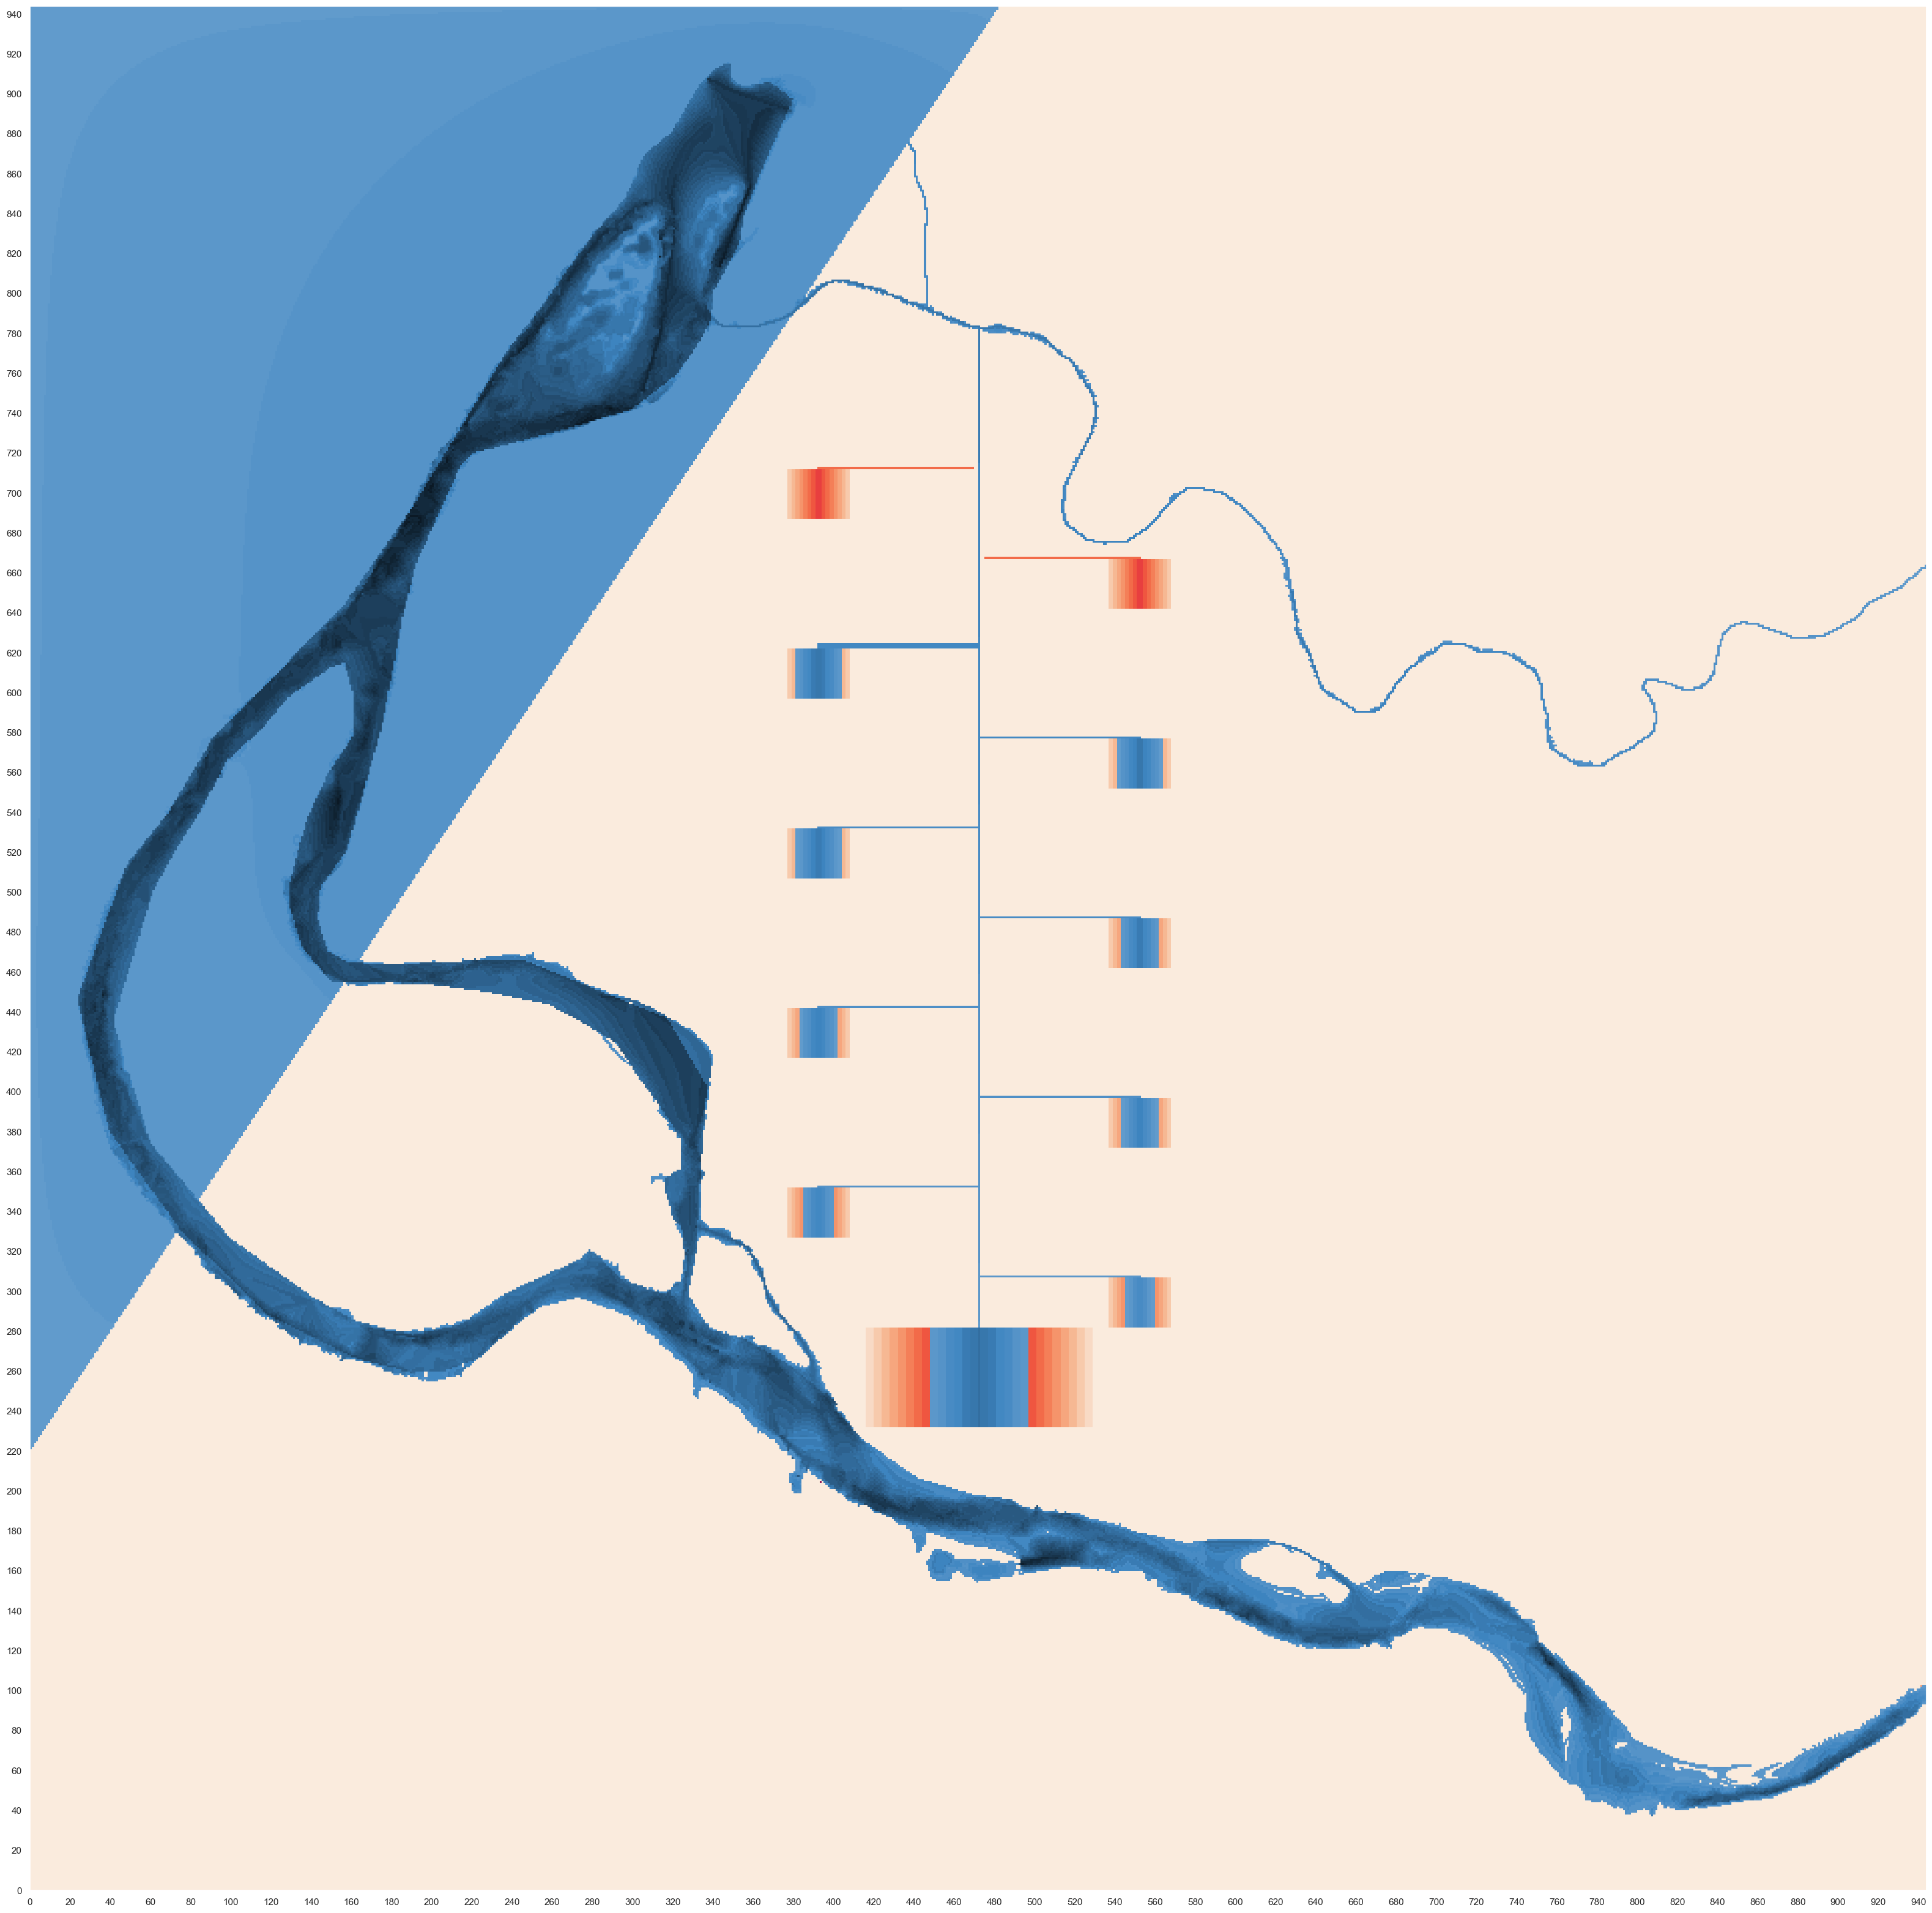

In [52]:
fig, ax = plt.subplots()
a = ax.pcolormesh(relief4)
b = ax.pcolormesh(np.where(HH25 != 0, HH25, np.nan), cmap=mcolors.ListedColormap(blue))
# ax.pcolormesh(np.where(rusla != 0, rusla, np.nan))
# ax.pcolormesh(np.where(A != 0, A, np.nan), cmap=mcolors.ListedColormap('#FF0000'))
# rusla[581, 810]
# rusla[575, 806]
# rusla[616, 736]
# rusla[590, 668]
# rusla[589, 664]
# rusla[717, 519]
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))

ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))
# fig.colorbar(a)
# fig.colorbar(b)
fig.set_figwidth(40)    
fig.set_figheight(40)
plt.show()